# ResNet

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

# Load Data

In [2]:
name = 'dataWin.csv' if os.name == 'nt' else 'data.csv'

labels = pd.read_csv(name)
labels.head()

,path,value
0,D:\Studia\MGU\Data\PS-Battles-master\originals...,0
1,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
2,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
3,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1
4,D:\Studia\MGU\Data\PS-Battles-master\photoshop...,1


# Show some Data

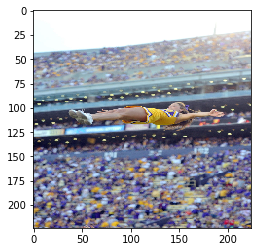

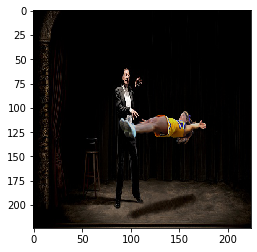

In [5]:
def get_image(path):
    img = Image.open(path)
    img = img.resize((224,224))
    img = img.convert('RGB')
    img = np.array(img)
    return img

org_row = labels[labels.value == 0].path[0]
plt.imshow(get_image(org_row))
plt.show()

ps_row = labels[labels.value == 1].path[1]
plt.imshow(get_image(ps_row))
plt.show()

# Load model and sumerize

In [6]:
from keras.applications.resnet import ResNet50

model = ResNet50()
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

# Load data to variables and split into train and test

In [8]:
from sklearn.model_selection import train_test_split
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

data = []

# Load just 1/3 of data
for i in labels.path.values[::3]:
    data.append(get_image(i).flatten()) 
    
X = pd.DataFrame(data)
Y = pd.Series(labels.value.values[::3])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=1234123)

# Dystrybucja labelek w secie treningowym
pd.Series(y_train).value_counts()

KeyboardInterrupt: 

# Notes while waitng for results

[link do artykułu](https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38)

In [ ]:
X.to_csv('X.csv', index=False)

In [ ]:
# Normalizacja

from keras.preprocessing.image import img_to_array, array_to_img

X_train = X_train.astype(‘float32’) 
y_train = y_train.astype(‘float32’) 
X_train /= 255 
y_train /= 255 
 
# visualize a sample image 
print(X_train[0].shape) 
array_to_img(X_train[0]

In [ ]:
from keras.models import Model
import keras

IMG_WIDTH=300
IMG_HEIGHT=300

restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))

output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)

restnet = Model(restnet.input, output=output)

# Zamrożenie wag
for layer in restnet.layers:
    layer.trainable = False
    
restnet.summary()

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(restnet)

model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, steps_per_epoch=100, epochs=100, validation_data=y_train, validation_steps=50, verbose=1)

In [ ]:
# model.save(‘test_resnet50.h5’)